**Введение:**

Данная работа представляет собой прогноз цены BTC в 2024 году на основе данных за период 2017-2023 год

Используемые модели: линейная регрессия, LTSM, полиноминальная регрессия


**Introduction:**

This work is a forecast of the price of BTC in 2024 based on data for the period 2017-2023

Models used: linear regression, LTSM, polynomial regression

Until the final price charts, the code is provided with comments in English

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
# Получаем исторические данные о котировках BTC с Yahoo Finance
# Getting historical data on BTC quotes from Yahoo Finance
btc_data = yf.download('BTC-USD', start='2017-01-01', end='2024-01-01', interval='1d')
btc_data_full = yf.download('BTC-USD', start='2017-01-01', end='2024-05-15', interval='1d')
btc_data_2024_2025 = yf.download('BTC-USD', start='2024-01-01', end='2025-01-01', interval='1d')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Линейная регрессия/Linear Regression**

In [4]:
# Отбираем данные для X (даты) и y (цена закрытия на конец дня)
# Selecting data for X (date) and y (day closing price)
X = np.array([i for i in range(len(btc_data))]).reshape(-1, 1)
y = np.array(btc_data['Close'])

# Создаем модель линейной регрессии
# Creating a linear regression model
model_Linear = LinearRegression()

# Производим подгонку модели
# Fitting the model
model_Linear.fit(X, y)

# Получаем прогнозы от модели
# Receiving predictions from the model
y_pred_linear = model_Linear.predict(X)

# Выводим коэффициенты регрессии
# Output regression coefficients
print('Коэффициент наклона (slope):', model_Linear.coef_[0])
print('Свободный член (intercept):', model_Linear.intercept_)

Коэффициент наклона (slope): 15.062265888564864
Свободный член (intercept): -18.918808191814605


In [5]:
# Создаем массив дат для прогнозирования
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([i for i in range(len(btc_data), len(btc_data)+len(future_dates))]).reshape(-1, 1)

# Получаем прогнозы от модели для будущих дат
future_y_pred_linear = model_Linear.predict(future_X)

**LSTM**

In [6]:
# Подготовка данных для модели LSTM
# Preparing data for the LSTM model
X_train = np.array([i for i in range(len(btc_data_full))]).reshape(-1, 1)
y_train = btc_data_full['Close'].values

# Создание и обучение модели LSTM
# Creating and train an LSTM model
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
modelLSTM.add(Dense(1))
modelLSTM.compile(optimizer='adam', loss='mse')
modelLSTM.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1) #loss не падает больше 3

# Создаем массив дат для прогнозирования
# Creating an array of dates for forecasting
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([len(btc_data_full) + i for i in range(len(future_dates))]).reshape(-1, 1)

# Получаем прогнозы от модели LSTM для будущих дат
# Geting predictions from the LSTM model for future dates
future_y_pred_LSTM = modelLSTM.predict(future_X)

Epoch 1/3
2691/2691 [==============================] - 19s 5ms/step - loss: 308563584.0000
Epoch 2/3
2691/2691 [==============================] - 12s 5ms/step - loss: 149044832.0000
Epoch 3/3
12/12 [==============================] - 0s 2ms/step


**`Полиномиальная регрессия/Polynomial regression**

На 5

In [7]:
# Создаем полиномиальные признаки
# Creating polynomial features
poly_features = PolynomialFeatures(degree=5) # можно изменить степень полинома
X_poly = poly_features.fit_transform(X)

# Создаем и обучаем модель полиномиальной регрессии
# Creating and fitting a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Создаем массив дат для прогнозирования
# Creating an array of dates for forecasting
future_dates_Poly = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([i for i in range(len(btc_data), len(btc_data)+len(future_dates_Poly))]).reshape(-1, 1)
future_X_poly = poly_features.fit_transform(future_X)

# Получаем прогнозы от модели для будущих дат
# Receiving forecasts from the model for future dates
future_y_pred_Poly = model.predict(future_X_poly)

На 7

In [8]:
# Создаем полиномиальные признаки
# Creating polynomial features
poly_features2 = PolynomialFeatures(degree=7) # можно изменить степень полинома
X_poly = poly_features2.fit_transform(X)

# Создаем и обучаем модель полиномиальной регрессии
# Creating and fitting a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Создаем массив дат для прогнозирования
# Creating an array of dates for forecasting
future_dates_Poly = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([i for i in range(len(btc_data), len(btc_data)+len(future_dates_Poly))]).reshape(-1, 1)
future_X_poly = poly_features2.fit_transform(future_X)

# Получаем прогнозы от модели для будущих дат
# Receiving forecasts from the model for future dates
future_y_pred_Poly2 = model.predict(future_X_poly)

In [9]:
# Создаем полиномиальные признаки
# Creating polynomial features
poly_features = PolynomialFeatures(degree=5) # можно изменить степень полинома
X_poly = poly_features.fit_transform(X)

# Создаем и обучаем модель полиномиальной регрессии
# Creating and fitting a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Создаем массив дат для прогнозирования
# Creating an array of dates for forecasting
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([i for i in range(len(btc_data), len(btc_data)+len(future_dates))]).reshape(-1, 1)
future_X_poly = poly_features.fit_transform(future_X)

# Получаем прогнозы от модели для будущих дат
# Receiving forecasts from the model for future dates
future_y_pred_Poly_full = model.predict(future_X_poly)

# Создаем полиномиальные признаки
# Creating polynomial features
poly_features2 = PolynomialFeatures(degree=7) # можно изменить степень полинома
X_poly = poly_features2.fit_transform(X)

# Создаем и обучаем модель полиномиальной регрессии
# Creating an array of dates for forecasting
model = LinearRegression()
model.fit(X_poly, y)

# Создаем массив дат для прогнозирования
# Creating polynomial features
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01')
future_X = np.array([i for i in range(len(btc_data), len(btc_data)+len(future_dates))]).reshape(-1, 1)
future_X_poly = poly_features2.fit_transform(future_X)

# Получаем прогнозы от модели для будущих дат
# Receiving forecasts from the model for future dates
future_y_pred_Poly2_full = model.predict(future_X_poly)

**Итоговый график цены/Final price chart**

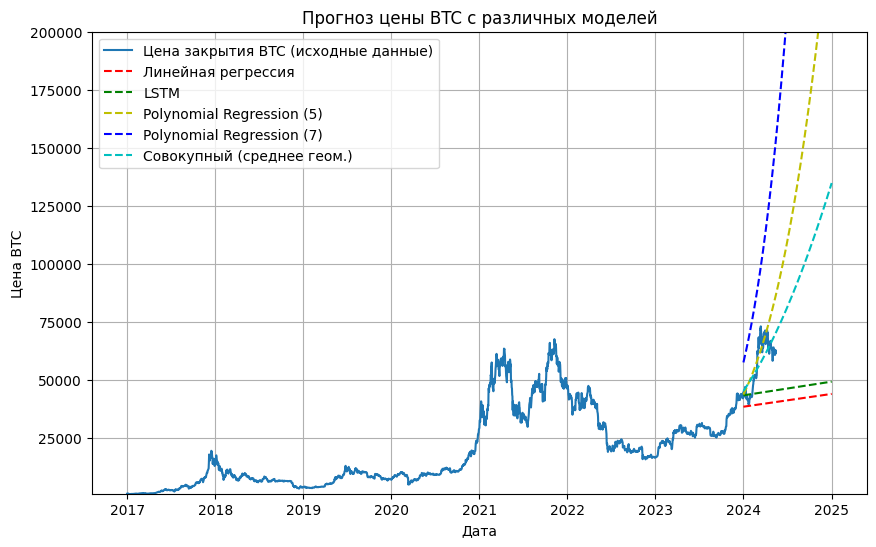

In [14]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(btc_data_full.index, btc_data_full['Close'], label='Цена закрытия BTC (исходные данные)')
#Линейная регрессия
plt.plot(future_dates, future_y_pred_linear, linestyle='--', color='r', label='Линейная регрессия')
#LSTM
plt.plot(future_dates, future_y_pred_LSTM, linestyle='--', color='g', label='LSTM')
#Полиномиальная регрессия
plt.plot(future_dates, future_y_pred_Poly, linestyle='--', color='y', label='Polynomial Regression (5)')
plt.plot(future_dates_Poly, future_y_pred_Poly2, linestyle='--', color='b', label='Polynomial Regression (7)')
#Задаем совокупный
future_y_pred_LSTM = future_y_pred_LSTM.flatten()
sov=(future_y_pred_LSTM*future_y_pred_linear*future_y_pred_Poly_full*future_y_pred_Poly2_full)**(1/4)
plt.plot(future_dates, sov, linestyle='--', color='c', label='Совокупный (среднее геом.)')



plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.title('Прогноз цены BTC с различных моделей')
plt.legend()
plt.grid()
plt.ylim(1000, 200000)  # Ограничение масштаба оси Y
plt.show()

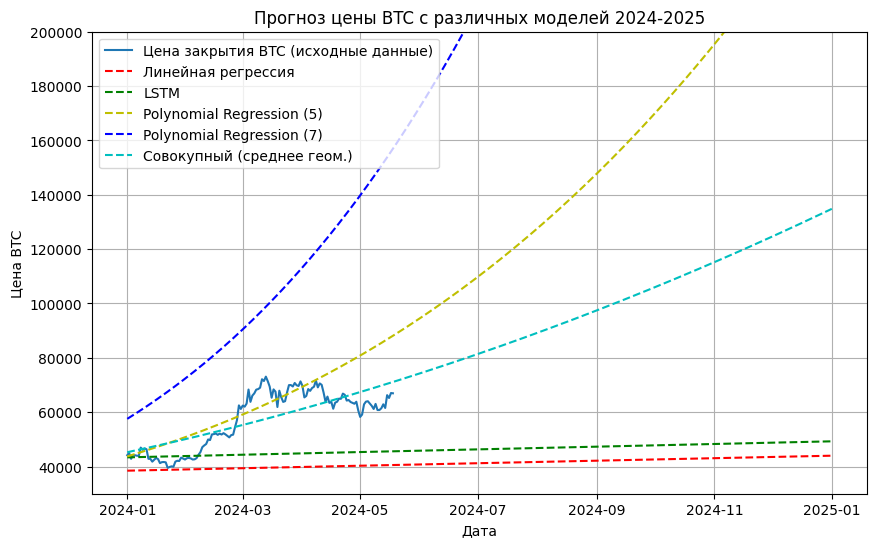

In [15]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(btc_data_2024_2025.index, btc_data_2024_2025['Close'], label='Цена закрытия BTC (исходные данные)')
#Линейная регрессия
plt.plot(future_dates, future_y_pred_linear, linestyle='--', color='r', label='Линейная регрессия')
#LSTM
plt.plot(future_dates, future_y_pred_LSTM, linestyle='--', color='g', label='LSTM')
#Полиномиальная регрессия
plt.plot(future_dates, future_y_pred_Poly, linestyle='--', color='y', label='Polynomial Regression (5)')
plt.plot(future_dates_Poly, future_y_pred_Poly2, linestyle='--', color='b', label='Polynomial Regression (7)')
#Задаем совокупный
sovgeom=(future_y_pred_LSTM*future_y_pred_linear*future_y_pred_Poly_full*future_y_pred_Poly2_full)**(1/4)
plt.plot(future_dates, sovgeom, linestyle='--', color='c', label='Совокупный (среднее геом.)')



plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.title('Прогноз цены BTC с различных моделей 2024-2025')
plt.legend()
plt.grid()
plt.ylim(30000, 200000)  # Ограничение масштаба оси Y
plt.show()

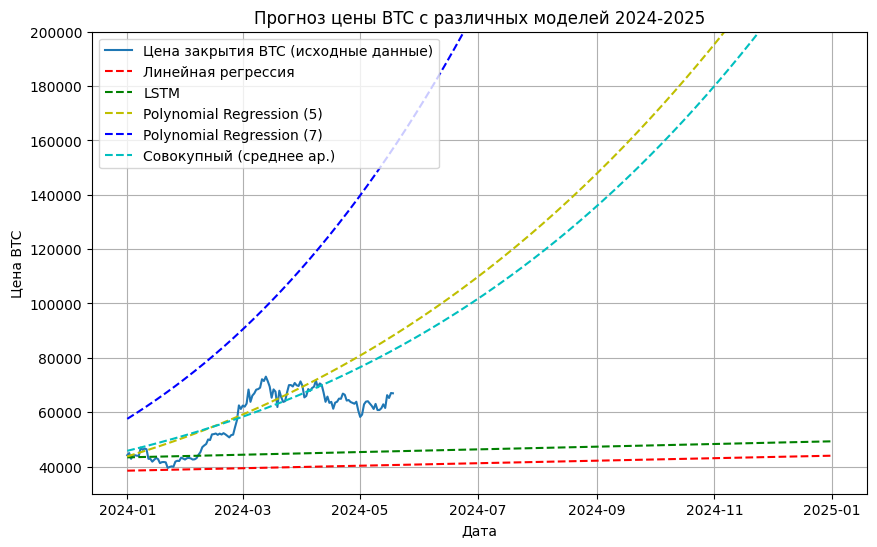

In [16]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(btc_data_2024_2025.index, btc_data_2024_2025['Close'], label='Цена закрытия BTC (исходные данные)')
#Линейная регрессия
plt.plot(future_dates, future_y_pred_linear, linestyle='--', color='r', label='Линейная регрессия')
#LSTM
plt.plot(future_dates, future_y_pred_LSTM, linestyle='--', color='g', label='LSTM')
#Полиномиальная регрессия
plt.plot(future_dates, future_y_pred_Poly, linestyle='--', color='y', label='Polynomial Regression (5)')
plt.plot(future_dates_Poly, future_y_pred_Poly2, linestyle='--', color='b', label='Polynomial Regression (7)')
#Задаем совокупный
sovar=(future_y_pred_LSTM+future_y_pred_linear+future_y_pred_Poly_full+future_y_pred_Poly2_full)*(1/4)
plt.plot(future_dates, sovar, linestyle='--', color='c', label='Совокупный (среднее ар.)')



plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.title('Прогноз цены BTC с различных моделей 2024-2025')
plt.legend()
plt.grid()
plt.ylim(30000, 200000)  # Ограничение масштаба оси Y
plt.show()

Значения среднего ар. больше среднего геом., объединим графики

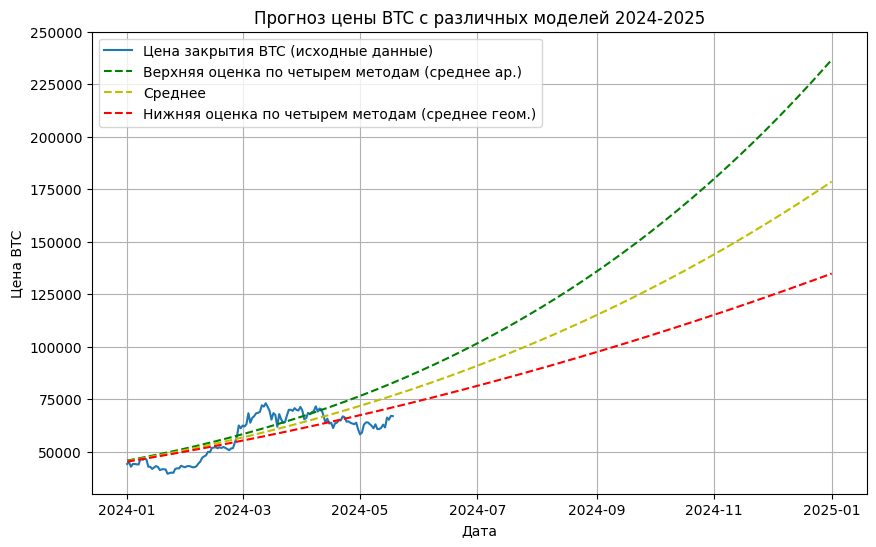

In [24]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(btc_data_2024_2025.index, btc_data_2024_2025['Close'], label='Цена закрытия BTC (исходные данные)')
#Cовокупный
plt.plot(future_dates, sovar, linestyle='--', color='g', label='Верхняя оценка по четырем методам (среднее ар.)')
plt.plot(future_dates, (sovgeom*sovar)**0.5, linestyle='--', color='y', label='Среднее')
plt.plot(future_dates, sovgeom, linestyle='--', color='r', label='Нижняя оценка по четырем методам (среднее геом.)')




plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.title('Прогноз цены BTC с различных моделей 2024-2025')
plt.legend()
plt.grid()
plt.ylim(30000, 250000)  # Ограничение масштаба оси Y
plt.show()

**Вывод:**

Диапазон цены BTC 125к-225к к концу 2025 года

Верхняя и нижняя граница обусловлены совокупным грогнозом: средним арифметическим и геометрическим моделей

**Conclusion:**

BTC price range 125k-225k by the end of 2025

The upper and lower limits are determined by the cumulative forecast: the arithmetic mean and geometric mean of models


